Este es un codigo de Python creado en Colab para mostrar de manera sencilla un ejemplo del modelo Solow Swan de crecimiento

## Modelo de Solow


# El modelo de crecimiento de Solow-Swan



En este cuaderno veremos el modelo de [Robert Solow (1925–2023)](https://en.wikipedia.org/wiki/Robert_Solow) y [Trevor Swan (1918–1989)](https://en.wikipedia.org/wiki/Trevor_Swan).

El modelo se utiliza para estudiar el crecimiento a largo plazo.

Aunque el modelo es simple, contiene algunas lecciones interesantes.

Usaremos las siguientes importaciones.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## El modelo

En una economía de Solow-Swan, los agentes ahorran una fracción fija de su dinero actual ~ de sus ingresos.

Los ahorros sostienen o aumentan el stock de capital.

El capital se combina con el trabajo para producir productos, que a su vez se pagan a
trabajadores y propietarios del capital.

Para simplificar las cosas, ignoramos el crecimiento de la población y la productividad.

Para cada número entero $ t \geq 0 $, producto $ Y_t $ en el periodo $ t $ esta dado por $ Y_t =
F(K_t, L_t) $, Donde $ K_t $ es el capital, $ L_t $ es el trabajo y $ F $ es un agregado
función de producción.

La funcion $ F $ se supone que es no negativo y
**homogéneo de grado uno**, es decir
eso

$$
F(\lambda K, \lambda L) = \lambda F(K, L)
    \quad \text{para todo } \lambda \geq 0
$$

Las funciones de producción con esta propiedad incluyen

- la función **Cobb-Douglas** $ F(K, L) = A K^{\alpha}
  L^{1-\alpha} $ con $ 0 \leq \alpha \leq 1 $ y  
- la función **CES** $ F(K, L) = \left\{ a K^\rho + b L^\rho \right\}^{1/\rho} $
  con $ a, b, \rho > 0 $.


Suponemos una economía cerrada, por lo que la inversión interna agregada es igual al ahorro.

La tasa de ahorro es una constante $ s $ que satisface $ 0 \leq s \leq 1 $, de modo que el agregado
Tanto la inversión como el ahorro son iguales a $ s Y_t $.

El capital se deprecia: sin reponer mediante inversión, una unidad de capital hoy
mañana se convierte en $ 1-\delta $ unidades.

De este modo,

$$
K_{t+1} = s F(K_t, L_t) + (1 - \delta) K_t
$$

Sin crecimiento demográfico, $ L_t $ es igual a una constante $ L $.

Configurando $ k_t := K_t / L $ y usando la homogeneidad de grado uno ahora se obtiene

$$
k_ {t+1}
    = s \frac{F(K_t, L)}{L} + (1 - \delta) k_t
    = s F(k_t, 1) + (1 - \delta) k_t
$$

Con $ f(k) := F(k, 1) $, la expresión final para la dinámica del capital es


<a id='ecuación-solow'></a>
$$
k_{t+1} = g(k_t)
    \text{ donde } g(k) := s f(k) + (1 - \delta) k \tag{1}
$$

Nuestro objetivo es conocer la evolución de $ k_t $ a lo largo del tiempo,
dado un stock de capital inicial exógeno $ k_0 $.

## Analisis gráfico

Para comprender la dinámica de la secuencia $ (k_t)_{t \geq 0} $ usamos una recta de 45 grados.

Para hacerlo, primero
Es necesario especificar la forma funcional de $ f $ y asignar valores a los parámetros.

Elegimos la especificación Cobb-Douglas $ f(k) = A k^\alpha $ y establecemos $ A=2.0 $,
$ \alpha=0.3 $, $ s=0.3 $ y $ \delta=0.4 $.

Luego se traza la función $ g $ de [(1)](#equation-solow), junto con la línea de 45 grados.

Definamos las constantes.

In [ ]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
x0 = 0.25
xmin, xmax = 0, 3

Ahora, definimos la función $g$.

In [ ]:
def g(A, s, alpha, delta, k):
    return A * s * k**alpha + (1 - delta) * k

Grafiquemos la recta de 45 grados de $ g $.

In [ ]:
def plot45(kstar=None):
    xgrid = np.linspace(xmin, xmax, 12000)

    fig, ax = plt.subplots()

    ax.set_xlim(xmin, xmax)

    g_values = g(A, s, alpha, delta, xgrid)

    ymin, ymax = np.min(g_values), np.max(g_values)
    ax.set_ylim(ymin, ymax)

    lb = r'$g(k) = sAk^{\alpha} + (1 - \delta)k$'
    ax.plot(xgrid, g_values,  lw=2, alpha=0.6, label=lb)
    ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$')

    if kstar:
        fps = (kstar,)

        ax.plot(fps, fps, 'go', ms=10, alpha=0.6)

        ax.annotate(r'$k^* = (sA / \delta)^{(1/(1-\alpha))}$',
                 xy=(kstar, kstar),
                 xycoords='data',
                 xytext=(-40, -60),
                 textcoords='offset points',
                 fontsize=14,
                 arrowprops=dict(arrowstyle="->"))

    ax.legend(loc='upper left', frameon=False, fontsize=12)

    ax.set_xticks((0, 1, 2, 3))
    ax.set_yticks((0, 1, 2, 3))

    ax.set_xlabel('$k_t$', fontsize=12)
    ax.set_ylabel('$k_{t+1}$', fontsize=12)

    plt.show()

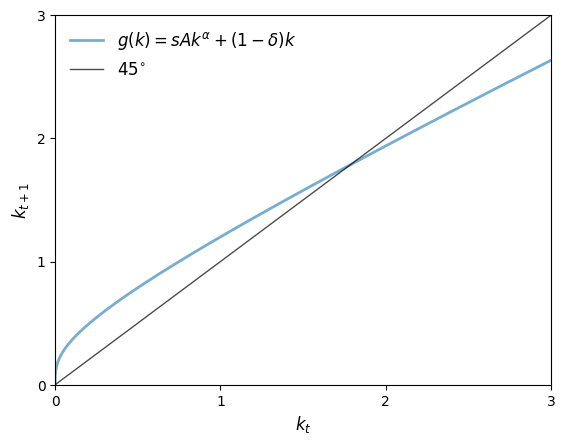

In [ ]:
plot45()

La función
𝑔 muestra cómo el capital per cápita cambia de un periodo a otro en función de la producción y la depreciación del capital.

Supongamos que, en algún $ k_t $, el valor $ g(k_t) $ se encuentra estrictamente por encima de la línea de 45 grados.

Entonces tenemos $ k_{t+1} = g(k_t) > k_t $ y el capital por trabajador aumenta.

Si $ g(k_t) < k_t $ entonces el capital por trabajador cae.

Si $ g(k_t) = k_t $, entonces estamos en un **estado estable** y $ k_t $ permanece constante.

(Un [estado estacionario](https://intro.quantecon.org/scalar_dynam.html#scalar-dynam-steady-state) del modelo es un [punto fijo](https://en.wikipedia.org/wiki/Fixed_point_%28mathematics%29) del mapeo $g$.)

Por la forma de la función $ g $ en la figura, vemos que
hay un estado estacionario único en $ (0, \infty) $.

Resuelve $ k = s Ak^{\alpha} + (1-\delta)k $ y por lo tanto viene dado por


<a id='ecuación-kstarss'></a>
$$
k^* := \left( \frac{s A}{\delta} \right)^{1/(1 - \alpha)} \tag{2}
$$

Si el capital inicial es inferior a $ k^* $, entonces el capital aumenta con el tiempo.

Si el capital inicial está por encima de este nivel, entonces ocurre lo contrario.

Tracemos el diagrama de 45 grados para mostrar $ k^* $ en el gráfico.

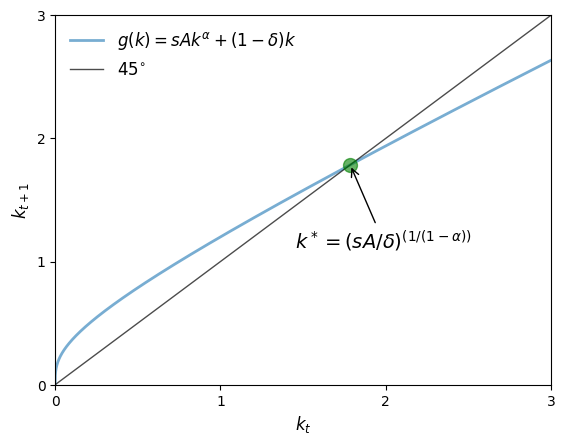

In [ ]:
kstar = ((s * A) / delta)**(1/(1 - alpha))
plot45(kstar)

De nuestro análisis gráfico, parece que $ (k_t) $ converge a $ k^* $, independientemente del capital inicial
$k_0$.

Esta es una forma de [estabilidad global](https://intro.quantecon.org/scalar_dynam.html#scalar-dynam-global-stability).

La siguiente figura muestra tres trayectorias temporales para el capital, desde
tres condiciones iniciales distintas, bajo la parametrización enumerada anteriormente.

En esta parametrización, $ k^* \approx 1,78 $.

Definamos las constantes y tres condiciones iniciales distintas.

In [ ]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
x0 = np.array([.25, 1.25, 3.25])

ts_length = 20
xmin, xmax = 0, ts_length
ymin, ymax = 0, 3.5

In [ ]:
def simulate_ts(x0_values, ts_length):

    k_star = (s * A / delta)**(1/(1-alpha))
    fig, ax = plt.subplots(figsize=[11, 5])
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    ts = np.zeros(ts_length)

    # simulate and plot time series
    for x_init in x0_values:
        ts[0] = x_init
        for t in range(1, ts_length):
            ts[t] = g(A, s, alpha, delta, ts[t-1])
        ax.plot(np.arange(ts_length), ts, '-o', ms=4, alpha=0.6,
                label=r'$k_0=%g$' %x_init)
    ax.plot(np.arange(ts_length), np.full(ts_length,k_star),
            alpha=0.6, color='red', label=r'$k^*$')
    ax.legend(fontsize=10)

    ax.set_xlabel(r'$t$', fontsize=14)
    ax.set_ylabel(r'$k_t$', fontsize=14)

    plt.show()

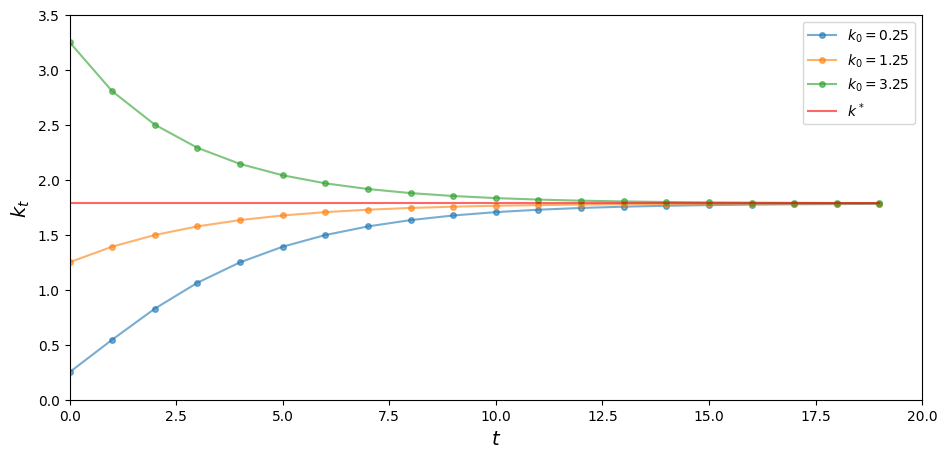

In [ ]:
simulate_ts(x0, ts_length)

Como era de esperar, todas las trayectorias temporales de la figura convergen en $ k^* $.

## Crecimiento en tiempo continuo

En esta sección, investigamos una versión de tiempo continuo del modelo de Solow-Swan.

Veremos cómo el suavizado proporcionado por el tiempo continuo puede
simplificar nuestro análisis.

Recuerde que la dinámica del tiempo discreto del capital es
dado por $ k_{t+1} = s f(k_t) + (1 - \delta) k_t $.

Una simple reordenación da la tasa de cambio por unidad de tiempo:

$$
\Delta k_t = s f(k_t) - \delta k_t
    \quad \text{dónde} \quad
    \Delta k_t := k_{t+1} - k_t
$$

Llevar el paso de tiempo a cero da el límite de tiempo continuo


<a id='ecuación-solowc'></a>
$$
k'_t = s f(k_t) - \delta k_t
    \qquad \text{con} \qquad
    k'_t := \frac{d}{dt} k_t \tag{3}
$$
Nuestro objetivo es conocer la evolución de $ k_t $ a lo largo del tiempo,
dado un stock inicial $k_0$.

Un **estado estacionario** para [(3)](#ecuación-solowc) es un valor $ k^* $
en el cual el capital no cambia, es decir $ k'_t = 0 $ o, equivalentemente,
$ s f(k^*) = \delta k^* $.

Asumimos
$ f(k) = Ak^\alpha $, entonces $ k^* $ resuelve
$ s A k^\alpha = \delta k $.

La solución es la misma que en el caso del tiempo discreto; consulte [(2)](#equation-kstarss).

La dinámica está representada en
la siguiente figura, manteniendo la parametrización que utilizamos
arriba.

Escribiendo $ k'_t = g(k_t) $ con $ g(k) =
s Ak^\alpha - \delta k $, los valores de $ k $ con $ g(k) > 0 $ implican $ k'_t > 0 $, entonces
el capital está aumentando.

Cuando $ g(k) < 0 $, ocurre lo contrario.  Una vez más, los altos rendimientos marginales de
ahorros con bajos niveles de capital combinados con bajas tasas de rendimiento en altos
Los niveles de capital se combinan para producir estabilidad global.

Para ver esto en una figura, definamos las constantes.

In [ ]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4

A continuación definimos la función $g$ para crecimiento en tiempo continuo

In [ ]:
def g_con(A, s, alpha, delta, k):
    return A * s * k**alpha - delta * k

In [ ]:
def plot_gcon(kstar=None):

    k_grid = np.linspace(0, 2.8, 10000)

    fig, ax = plt.subplots(figsize=[11, 5])
    ax.plot(k_grid, g_con(A, s, alpha, delta, k_grid), label='$g(k)$')
    ax.plot(k_grid, 0 * k_grid, label="$k'=0$")

    if kstar:
        fps = (kstar,)

        ax.plot(fps, 0, 'go', ms=10, alpha=0.6)


        ax.annotate(r'$k^* = (sA / \delta)^{(1/(1-\alpha))}$',
                 xy=(kstar, 0),
                 xycoords='data',
                 xytext=(0, 60),
                 textcoords='offset points',
                 fontsize=12,
                 arrowprops=dict(arrowstyle="->"))

    ax.legend(loc='lower left', fontsize=12)

    ax.set_xlabel("$k$",fontsize=10)
    ax.set_ylabel("$k'$", fontsize=10)

    ax.set_xticks((0, 1, 2, 3))
    ax.set_yticks((-0.3, 0, 0.3))

    plt.show()

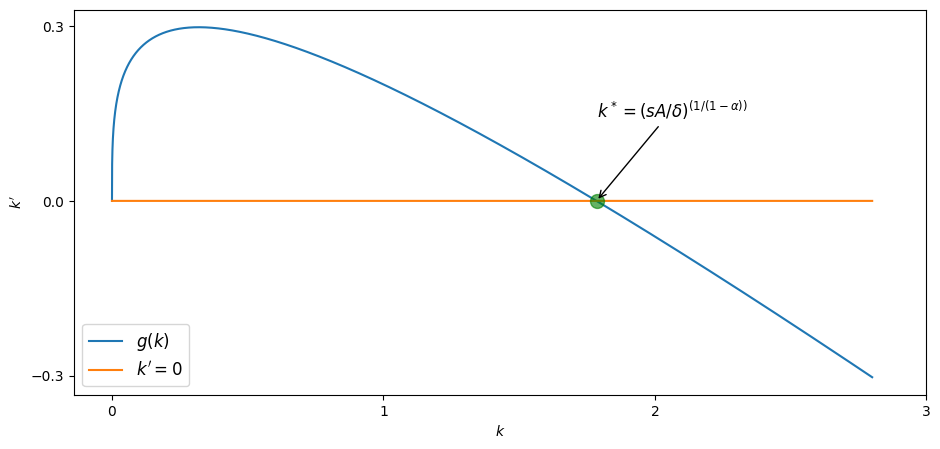

In [ ]:
kstar = ((s * A) / delta)**(1/(1 - alpha))
plot_gcon(kstar)

Esto muestra la estabilidad global para una parametrización fija, pero
¿Cómo mostraríamos formalmente lo mismo para un continuo de parámetros continuos?

En el caso del tiempo discreto, es difícil obtener una expresión clara para $ k_t $.

En tiempo continuo el proceso es más fácil: podemos obtener una relativamente simple
expresión para $ k_t $ que especifica la ruta completa.

El primer paso es
para establecer $ x_t := k_t^{1-\alpha} $, de modo que $ x'_t = (1-\alpha) k_t^{-\alpha}
k'_t$.

Sustituyendo en $ k'_t = sAk_t^\alpha - \delta k_t $ lleva a la
ecuación diferencial lineal


<a id='ecuación-xsolow'></a>
$$
x'_t = (1-\alpha) (sA - \delta x_t) \tag{4}
$$

Esta ecuación, que es una [ecuación diferencial ordinaria lineal](https://math.libretexts.org/Bookshelves/Calculus/Calculus_%28Guichard%29/17%3A_Differential_Equations/17.01%3A_First_Order_Differential_Equations), tiene la solución

$$
x_t
    = \left(
        k_0^{1-\alpha} - \frac{sA}{\delta}
      \right)
      \mathrm{e}^{-\delta (1-\alpha) t} +
    \frac{sA}{\delta}
$$

(Puedes confirmar que esta función $ x_t $ satisface [(4)](#equation-xsolow) mediante
diferenciándolo con respecto a $t$.)

La conversión de nuevo a $ k_t $ produce


<a id='ecuación-ssivs'></a>
$$
k_t
    =
    \left[
        \left(
        k_0^{1-\alpha} - \frac{sA}{\delta}
      \right)
      \mathrm{e}^{-\delta (1-\alpha) t} +
    \frac{sA}{\delta}
    \right]^{1/(1-\alpha)} \tag{5}
$$

Dado que $ \delta > 0 $ y $ \alpha \in (0, 1) $, vemos inmediatamente que $ k_t \to
k^* $ como $ t \to \infty $ independiente de $ k_0 $.

Por tanto, la estabilidad global se mantiene.

## Analisis del consumo

## Ejercicio 2
Grafique el consumo per cápita $ c $ en el estado estacionario, como función de la tasa de ahorro $ s $, donde $ 0 \leq s \leq 1 $.

Utilice la especificación de Cobb-Douglas $ f(k) = A k^\alpha $.

Establezca $ A=2.0, \alpha=0.3, $ y $ \delta=0.5 $

Además, encuentre el valor aproximado de $ s $ que maximiza $ c^*(s) $ y muéstrelo en el gráfico.

## solucion al ejercicio [ejercicio 2](https://intro.quantecon.org/#solow_ex1)

El consumo en estado estacionario a una tasa de ahorro $ s $ está dado por

$$
c^*(s) = (1-s)f(k^*) = (1-s)A(k^*)^\alpha
$$

In [ ]:
A = 2.0
alpha = 0.3
delta = 0.5

In [ ]:
s_grid = np.linspace(0, 1, 1000)
k_star = ((s_grid * A) / delta)**(1/(1 - alpha))
c_star = (1 - s_grid) * A * k_star ** alpha

Encontremos el valor de $ s $ que maximiza $ c^* $ usando [scipy.optimize.minimize_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar).
Usaremos $ -c^*(s) $ ya que `minimize_scalar` encuentra el valor mínimo.

In [ ]:
from scipy.optimize import minimize_scalar

In [ ]:
def calc_c_star(s):
    k = ((s * A) / delta)**(1/(1 - alpha))
    return - (1 - s) * A * k ** alpha

In [ ]:
return_values = minimize_scalar(calc_c_star, bounds=(0, 1))
s_star_max = return_values.x
c_star_max = -return_values.fun
print(f"Function is maximized at s = {round(s_star_max, 4)}")

Function is maximized at s = 0.3


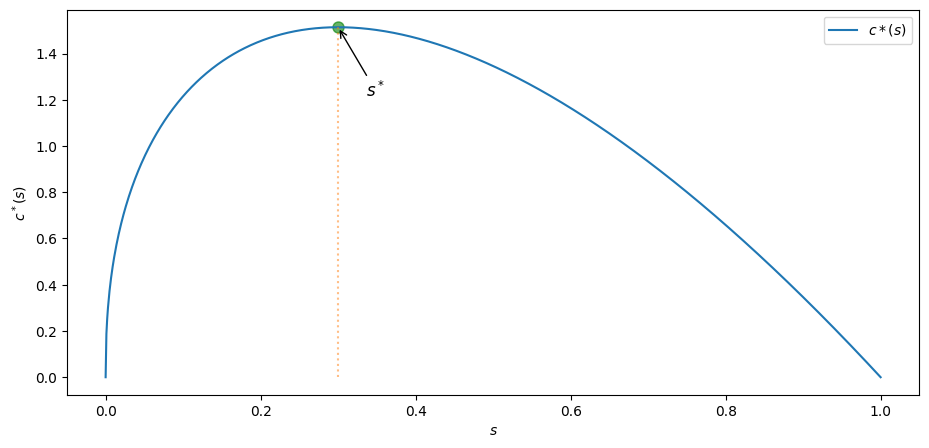

In [ ]:
x_s_max = np.array([s_star_max, s_star_max])
y_s_max = np.array([0, c_star_max])

fig, ax = plt.subplots(figsize=[11, 5])

fps = (c_star_max,)

# Highlight the maximum point with a marker
ax.plot((s_star_max, ), (c_star_max,), 'go', ms=8, alpha=0.6)

ax.annotate(r'$s^*$',
         xy=(s_star_max, c_star_max),
         xycoords='data',
         xytext=(20, -50),
         textcoords='offset points',
         fontsize=12,
         arrowprops=dict(arrowstyle="->"))
ax.plot(s_grid, c_star, label=r'$c*(s)$')
ax.plot(x_s_max, y_s_max, alpha=0.5, ls='dotted')
ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$c^*(s)$')
ax.legend()

plt.show()

También se puede intentar resolver esto matemáticamente diferenciando $ c^*(s) $ y resolver $ \frac{d}{ds}c^*(s)=0 $ usando [sympy](https://www.sympy.org/en/index.html).

In [ ]:
from sympy import solve, Symbol

In [ ]:
s_symbol = Symbol('s', real=True)
k = ((s_symbol * A) / delta)**(1/(1 - alpha))
c = (1 - s_symbol) * A * k ** alpha

Diferenciamos $ c $ y resolvamos usando [sympy.solve](https://docs.sympy.org/latest/modules/solvers/solvers.html#sympy.solvers.solvers.solve)

In [ ]:
# Solve using sympy
s_star = solve(c.diff())[0]
print(f"el ahorro es = {s_star}")
print(f"el consumo maximo es = {c_star_max}")

el ahorro es = 0.300000000000000
el consumo maximo es = 1.5137803219128798


Por cierto, la tasa de ahorro que maximiza el nivel de consumo per cápita en el estado estacionario se denomina [tasa de ahorro de la regla de oro](https://en.wikipedia.org/wiki/Golden_Rule_Savings_rate).